In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
A = 0.01
b = 0.01
d = 0.01
p = 0.01
u = 0.01
m = 0.03
rr =0.1
alpha = 0.12
beta = 0.01
gamma = 0.01
delta = 0.001

In [ ]:
# Parametros fraccionales

def M(x):
        return 1. #2./(2.-x)

#sigma = 0.6

#M1 = (2*(1-sigma))/float(M(sigma)*(2-sigma))

#M2 = (2*sigma)/float((2-sigma)*M(sigma))


# Funciones simples

def functionS(S,I,R):
        return A - (alpha*S*I)/float(1+beta*S+gamma*I**2) - d*S + p*R

def functionI(S,I,R):
        return (alpha*S*I)/float(1+beta*S+gamma*I**2) - (rr*u*I)/float(1+b*u*I) - d*I - delta*I - m*I

def functionR(S,I,R):
        return (rr*u*I)/float(1+b*u*I) - d*R - p*R + m*I


In [ ]:
h = 0.001



SS = []
II = []
RR = []

Sigma = [1, 0.9, 0.6, 0.3]

In [ ]:
for ciclos in range(4):

        sigma = Sigma[ciclos]

        s = 0.9
        i = 0.09
        r = 0.01
        t = 0

        s1 = s +0
        i1 = i +0
        r1 = r +0

        s2 = s +0
        i2 = i +0
        r2 = r +0

        s3 = s +0
        i3 = i +0
        r3 = r +0


        St = [s]
        It = [i]
        Rt = [r]
        T  = [t]

        for j in range(200000):

                t += h
                if ciclos == 0:

                        s1 = s + h*functionS(s,i,r)
                        i1 = i + h*functionI(s,i,r)
                        r1 = r + h*functionR(s,i,r)

                        s = s1 + 0
                        i = i1 + 0
                        r = r1 + 0

                        St.append(s)
                        It.append(i)
                        Rt.append(r)
                        T.append(t)




                else:
                        ans= -(1./M(sigma))*(1-sigma+(4./3.)*h*sigma)*functionS(s2,i2,r2) + (5*h*sigma)/(12*M(sigma))*functionS(s3,i3,r3)
                        ani= -(1./M(sigma))*(1-sigma+(4./3.)*h*sigma)*functionI(s2,i2,r2) + (5*h*sigma)/(12*M(sigma))*functionI(s3,i3,r3)
                        anr= -(1./M(sigma))*(1-sigma+(4./3.)*h*sigma)*functionR(s2,i2,r2) + (5*h*sigma)/(12*M(sigma))*functionR(s3,i3,r3)

                        s1 = s + (1./M(sigma))*(1-sigma + (23./12.)*sigma*h)*functionS(s,i,r) + ans
                        i1 = i + (1./M(sigma))*(1-sigma + (23./12.)*sigma*h)*functionI(s,i,r) + ani
                        r1 = r + (1./M(sigma))*(1-sigma + (23./12.)*sigma*h)*functionR(s,i,r) + anr

                        s3 = s2 + 0
                        i3 = i2 + 0
                        r3 = r2 + 0

                        s2 = s + 0
                        i2 = i + 0
                        r2 = r + 0

                        s = s1 + 0
                        i = i1 + 0
                        r = r1 + 0

                        St.append(s)
                        It.append(i)
                        Rt.append(r)
                        T.append(t)

        SS.append(St)
        II.append(It)
        RR.append(Rt)

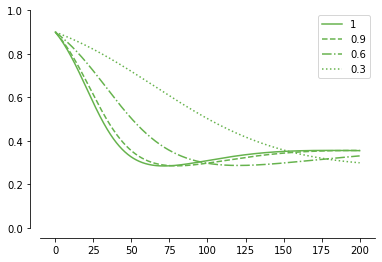

In [ ]:
fig,ax = plt.subplots()


ax.plot(T,SS[0], color = (0.4,0.7,0.3),label='1')
ax.plot(T,SS[1], ls='--', color = (0.4,0.7,0.3),label='0.9')
ax.plot(T,SS[2], ls='-.', color = (0.4,0.7,0.3),label='0.6')
ax.plot(T,SS[3], ls=':', color = (0.4,0.7,0.3),label='0.3')
#ax.plot(T,It)
#ax.plot(T,Rt)
#ax.set_title(u"SIRS Fractional Model")
ax.spines['left'].set_position(('outward',10))
ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yticks(range(10),minor=True)
ax.set_ylim([0,1])
ax.legend(framealpha=1)
#ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.legend()#loc="upper left", bbox_to_anchor=(0.8,0.2))
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
fig.savefig('AB-S1.png')
plt.show()

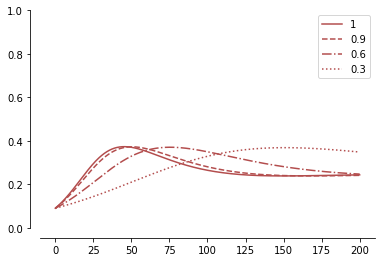

In [ ]:
fig,ax = plt.subplots()

ax.plot(T,II[0], color = (0.7,0.3,0.3),label='1')
ax.plot(T,II[1],ls='--', color = (0.7,0.3,0.3),label='0.9')
ax.plot(T,II[2],ls='-.', color = (0.7,0.3,0.3),label='0.6')
ax.plot(T,II[3],ls=':', color = (0.7,0.3,0.3), label='0.3')
ax.spines['left'].set_position(('outward',10))
ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yticks(range(10),minor=True)
ax.set_ylim([0,1])
ax.legend(framealpha=1)
#ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.legend()#loc="upper left", bbox_to_anchor=(0.8,0.2))
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
#fig.savefig('AB-I1.png')
plt.show()

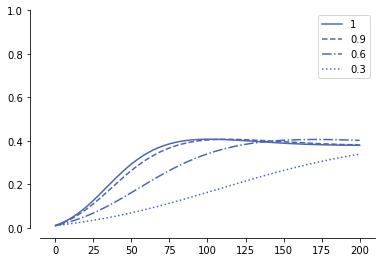

In [ ]:
fig,ax = plt.subplots()

ax.plot(T,RR[0], color = (0.3,0.4,0.7),label='1')
ax.plot(T,RR[1],ls='--', color = (0.3,0.4,0.7),label='0.9')
ax.plot(T,RR[2],ls='-.', color = (0.3,0.4,0.7),label='0.6')
ax.plot(T,RR[3],ls=':', color = (0.3,0.4,0.7), label='0.3')
ax.spines['left'].set_position(('outward',10))
ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yticks(range(10),minor=True)
ax.set_ylim([0,1])
ax.legend(framealpha=1)
#ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.legend()#loc="upper left", bbox_to_anchor=(0.8,0.2))
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
#fig.savefig('AB-R1.png')
plt.show()

# Euler Method

In [ ]:
# Funciones fraccionarias

def M(x):
        return 2./(2.-x)


def c1(S,I,R):
        num = I + gamma*I**3
        den = 1 + beta*S + gamma*I**2
        den = den**2
        return -alpha*(num/float(den)) - d

def c2(S,I,R):
        num = S + beta*S**2 - gamma*S*I**2
        den = 1 + beta*S + gamma*I**2
        den = den**2
        return -alpha*(num/float(den))

def c3(S,I,R):
        num = I + gamma*I**3
        den = 1 + beta*S + gamma*I**2
        den = den**2
        return alpha*(num/float(den))

def c4(S,I,R):
        num = S + beta*S**2 - gamma*S*I**2
        den = 1 + beta*S + gamma*I**2
        den = den**2
        return alpha*(num/float(den)) - (rr*u)/((1+b*u*I**2)**2) - d - delta - m

def c5(S,I,R):
        return (rr*u)/((1+b*u*I**2)**2) + m

c6 = -d-p

def k1(S,I,R):
        return (M1*c2(S,I,R))/float(1-M1*c1(S,I,R))

def k2(S,I,R):
        return (M1*p)/float(1-M1*c1(S,I,R))

def k3(S,I,R):
        return (M2*functionS(S,I,R))/float(1-M1*c1(S,I,R))

def k4(S,I,R):
        return (M1*c3(S,I,R))/float(1-M1*c4(S,I,R))

def k5(S,I,R):
        return (M2*functionI(S,I,R))/float(1-M1*c4(S,I,R))

def k6(S,I,R):
        return (M1*c5(S,I,R))/float(1-M1*c6)

def k7(S,I,R):
        return (M2*functionR(S,I,R))/float(1-M1*c6)


def dfunctionS(S,I,R):
        num = k1(S,I,R)*k5(S,I,R) + k2(S,I,R)*k5(S,I,R)*k6(S,I,R) + k2(S,I,R)*k7(S,I,R) + k3(S,I,R)
        den = 1 - k1(S,I,R)*k4(S,I,R) - k2(S,I,R)*k4(S,I,R)*k6(S,I,R)
        return num/float(den)

def dfunctionI(S,I,R):
        return k4(S,I,R)*dfunctionS(S,I,R) + k5(S,I,R)

def dfunctionR(S,I,R):
        return k6(S,I,R)*dfunctionI(S,I,R) + k7(S,I,R)


In [ ]:
s = 0.9
i = 0.09
r = 0.01
t = 0

St = [s]
It = [i]
Rt = [r]
T  = [t]

for j in range(200000):

        t += h
        s1 = s + h*functionS(s,i,r)
        i1 = i + h*functionI(s,i,r)
        r1 = r + h*functionR(s,i,r)

        s = s1 + 0
        i = i1 + 0
        r = r1 + 0

        St.append(s)
        It.append(i)
        Rt.append(r)
        T.append(t)



In [ ]:
sigma = 0.9

M1 = (2*(1-sigma))/float(M(sigma)*(2-sigma))

M2 = (2*sigma)/float((2-sigma)*M(sigma))

s = 0.9
i = 0.09
r = 0.01
t = 0

St2 = [s]
It2 = [i]
Rt2 = [r]
T2  = [t]

for j in range(200000):

        t += h
        s1 = s + h*dfunctionS(s,i,r)
        i1 = i + h*dfunctionI(s,i,r)
        r1 = r + h*dfunctionR(s,i,r)

        s = s1 + 0
        i = i1 + 0
        r = r1 + 0

        St2.append(s)
        It2.append(i)
        Rt2.append(r)
        T2.append(t)    

In [ ]:
sigma = 0.6

M1 = (2*(1-sigma))/float(M(sigma)*(2-sigma))

M2 = (2*sigma)/float((2-sigma)*M(sigma))



s = 0.9
i = 0.09
r = 0.01
t = 0

St3 = [s]
It3 = [i]
Rt3 = [r]
T3  = [t]

for j in range(200000):

        t += h
        s1 = s + h*dfunctionS(s,i,r)
        i1 = i + h*dfunctionI(s,i,r)
        r1 = r + h*dfunctionR(s,i,r)

        s = s1 + 0
        i = i1 + 0
        r = r1 + 0

        St3.append(s)
        It3.append(i)
        Rt3.append(r)
        T3.append(t)

In [ ]:
sigma = 0.3

M1 = (2*(1-sigma))/float(M(sigma)*(2-sigma))

M2 = (2*sigma)/float((2-sigma)*M(sigma))


s = 0.9
i = 0.09
r = 0.01
t = 0

St4 = [s]
It4 = [i]
Rt4 = [r]
T4  = [t]

for j in range(200000):

        t += h
        s1 = s + h*dfunctionS(s,i,r)
        i1 = i + h*dfunctionI(s,i,r)
        r1 = r + h*dfunctionR(s,i,r)

        s = s1 + 0
        i = i1 + 0
        r = r1 + 0

        St4.append(s)
        It4.append(i)
        Rt4.append(r)
        T4.append(t)

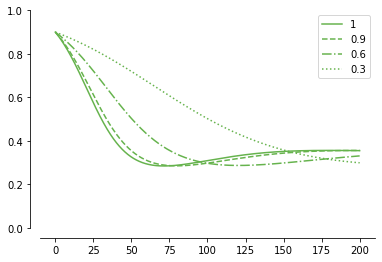

In [ ]:
fig,ax = plt.subplots()

ax.plot(T,St, color = (0.4,0.7,0.3),label='1')
ax.plot(T,St2,ls='--', color = (0.4,0.7,0.3),label='0.9')
ax.plot(T,St3,ls='-.', color = (0.4,0.7,0.3),label='0.6')
ax.plot(T,St4,ls=':', color = (0.4,0.7,0.3), label='0.3')
#ax.plot(T,It)
#ax.plot(T,Rt)
#ax.set_title(u"SIRS Fractional Model")
ax.spines['left'].set_position(('outward',10))
ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yticks(range(10),minor=True)
ax.set_ylim([0,1])
ax.legend(framealpha=1)
#ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.legend()#loc="upper left", bbox_to_anchor=(0.8,0.2))
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
fig.savefig('S2.png')
plt.show()

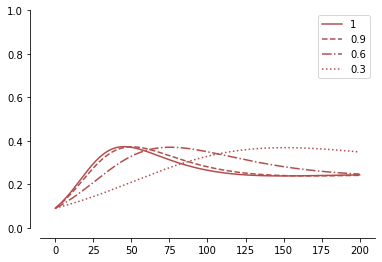

In [ ]:
fig,ax = plt.subplots()

#print(It)

ax.plot(T,It, color = (0.7,0.3,0.3),label='1')
ax.plot(T,It2,ls='--', color = (0.7,0.3,0.3),label='0.9')
ax.plot(T,It3,ls='-.', color = (0.7,0.3,0.3),label='0.6')
ax.plot(T,It4,ls=':', color = (0.7,0.3,0.3), label='0.3')
#ax.plot(T,It)
#ax.plot(T,Rt)
#ax.set_title(u"SIRS Fractional Model")
ax.spines['left'].set_position(('outward',10))
ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yticks(range(10),minor=True)
ax.set_ylim([0,1])
ax.legend(framealpha=1)
#ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.legend()#loc="upper left", bbox_to_anchor=(0.8,0.2))
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
fig.savefig('I2.png')
plt.show()

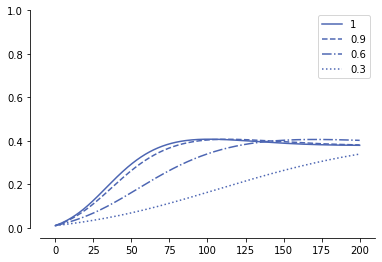

In [ ]:
fig,ax = plt.subplots()

ax.plot(T,Rt, color = (0.3,0.4,0.7),label='1')
ax.plot(T,Rt2,ls='--', color = (0.3,0.4,0.7),label='0.9')
ax.plot(T,Rt3,ls='-.', color = (0.3,0.4,0.7),label='0.6')
ax.plot(T,Rt4,ls=':', color = (0.3,0.4,0.7), label='0.3')
#ax.plot(T,It)
#ax.plot(T,Rt)
#ax.set_title(u"SIRS Fractional Model")
ax.spines['left'].set_position(('outward',10))
ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yticks(range(10),minor=True)
ax.set_ylim([0,1])
ax.legend(framealpha=1)
#ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.legend()#loc="upper left", bbox_to_anchor=(0.8,0.2))
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
fig.savefig('R2.png')
plt.show()

In [ ]:
StE1 = np.array(St)
StE2 = np.array(St2)
StE3 = np.array(St3)
StE4 = np.array(St4)


StA1 = np.array(SS[0])
StA2 = np.array(SS[1])
StA3 = np.array(SS[2])
StA4 = np.array(SS[3])

In [ ]:
n1 = len(StE1)
print(abs(np.sum((StE1-StA1)**2)/n1))
print(abs(np.sum((StE2-StA2)**2)/n1))
print(abs(np.sum((StE3-StA3)**2)/n1))
print(abs(np.sum((StE4-StA4)**2)/n1))

print("_______________________")
print(max(StE1-StA1))
print(max(StE2-StA2))
print(max(StE3-StA3))
print(max(StE4-StA4))

print("_______________________")
print(abs(np.sum((StE1-StA1))/n1))
print(abs(np.sum((StE2-StA2))/n1))
print(abs(np.sum((StE3-StA3))/n1))
print(abs(np.sum((StE4-StA4))/n1))

0.0
3.519137016306148e-12
2.0530584745585066e-12
6.249762706870971e-13
_______________________
0.0
3.5226011494415843e-06
2.2291902566085042e-06
1.0564296958337493e-06
_______________________
0.0
2.331988020686203e-08
3.484094861155017e-07
1.1668066809807823e-08


No handles with labels found to put in legend.
No handles with labels found to put in legend.


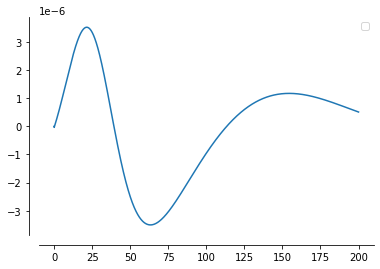

In [ ]:
fig,ax = plt.subplots()
ax.plot(T,StE2-StA2)
#ax.plot(T,St, color = (0.4,0.7,0.3),label='1')
#ax.plot(T,St2,ls='--', color = (0.4,0.7,0.3),label='0.9')
#ax.plot(T,St3,ls='-.', color = (0.4,0.7,0.3),label='0.6')
#ax.plot(T,St4,ls=':', color = (0.4,0.7,0.3), label='0.3')
#ax.plot(T,It)
#ax.plot(T,Rt)
#ax.set_title(u"SIRS Fractional Model")
ax.spines['left'].set_position(('outward',10))
ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yticks(range(10),minor=True)
#ax.set_ylim([0,1])
ax.legend(framealpha=1)
#ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.legend()#loc="upper left", bbox_to_anchor=(0.8,0.2))
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
fig.savefig('diff.png')
plt.show()

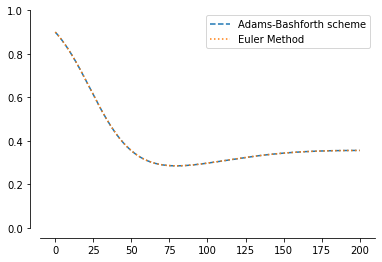

In [ ]:
fig,ax = plt.subplots()

ax.plot(T,StA2,ls = "--", label = "Adams-Bashforth scheme")
ax.plot(T,StE2,ls = ":",label="Euler Method")
#ax.plot(T,St, color = (0.4,0.7,0.3),label='1')
#ax.plot(T,St2,ls='--', color = (0.4,0.7,0.3),label='0.9')
#ax.plot(T,St3,ls='-.', color = (0.4,0.7,0.3),label='0.6')
#ax.plot(T,St4,ls=':', color = (0.4,0.7,0.3), label='0.3')
#ax.plot(T,It)
#ax.plot(T,Rt)
#ax.set_title(u"SIRS Fractional Model")
ax.spines['left'].set_position(('outward',10))
ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yticks(range(10),minor=True)
ax.set_ylim([0,1])
ax.legend(framealpha=1)
#ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.legend()#loc="upper left", bbox_to_anchor=(0.8,0.2))
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
fig.savefig('compare.png')
plt.show()